# Practica 8
1. Buscar la opcion que despliega W y B (verificar si sigue el ejemplo de clase)
2. Buscar una feed forward network que use batching (elegir las funciones de activacion). Aplicarla al ejemplo de clase
3. Ejecutar una ffn con el ejemplo complejo, maximo 30 minutos, y anotar si converge los ultimos w's y b's. Indicar que puntos quedan. (con las capas que queramos)

In [543]:
from keras.callbacks import LambdaCallback
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import keras
%matplotlib inline

## Parte 1
Mostrar los valores de los pesos y bias en cada iteracion del algoritmo para verificar el ejemplo de clase.

In [566]:
# Datos de entrenamiento
x = np.array([1, -1])
t = np.array([2, -1])

In [567]:
# Primera capa 
nn.add(Dense(1,
             activation=lambda x: x**2,
             input_shape=(1,),
             weights=[np.array([[-1]]), np.array([-2])]
))

# Segunda capa
nn.add(Dense(1, 
             activation='sigmoid',
             weights=[np.array([[1]]), np.array([2])]
))

In [568]:
# Configurar el proceso de aprendizaje de la red neuronal
nn.compile(loss='mean_squared_error', 
           optimizer=keras.optimizers.SGD(lr=0.4), 
           metrics=['accuracy'])

In [569]:
# Imprimir los pesos y bias iniciales de la red
initial_weights = []
initial_bias = []

for layer in nn.layers:
    initial_weights.append(layer.get_weights()[0])
    initial_bias.append(layer.get_weights()[1])
    
print('Pesos iniciales:')
    
for w in initial_weights:
    print(w)
    
print('\nBias iniciales:')

for b in initial_bias:
    print(b)

Pesos iniciales:
[[-1.6418417]]
[[1.0817649]]
[[-2.6318572]]
[[1.4039963]]
[[-2.647388]]
[[1.4187315]]
[[-2.8275745]]
[[1.583578]]
[[-2.6281958]]
[[1.4006765]]
[[-2.8164847]]
[[1.5734266]]
[[-1.]]
[[1.]]

Bias iniciales:
[-1.6418417]
[-3.5736508]
[0.00013021]
[-3.173101]
[0.03062829]
[-3.168479]
[0.06229037]
[-4.1208124]
[-0.02728162]
[-3.2114403]
[0.0493317]
[-4.02454]
[-2.]
[2.]


In [565]:
print_weights_l1 = LambdaCallback(on_batch_begin=lambda batch, logs: print(nn.layers[0].get_weights()))
print_separator = LambdaCallback(on_batch_begin=lambda batch, logs: print('---------------------------------'))
print_weights_l2 = LambdaCallback(on_batch_begin=lambda batch, logs: print(nn.layers[1].get_weights()))

In [549]:
# Entrenar la red neuronal
history = nn.fit(x, t, batch_size=None, epochs=100, verbose=0, callbacks=[print_weights_l1, print_weights_l2, print_separator])

[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1

[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
-----------

In [550]:
# Predecir las salidas para el vector x
t_predicted = nn.predict(x, batch_size=None)

In [551]:
# Imprimir los pesos y bias finales de la red
final_weights = []
final_bias = []

for layer in nn.layers:
    final_weights.append(layer.get_weights()[0])
    final_bias.append(layer.get_weights()[1])
    
print('Pesos finales:')
    
for w in final_weights:
    print(w)
    
print('\nBias finales:')

for b in final_bias:
    print(b)

Pesos finales:
[[-1.6418417]]
[[1.0817649]]
[[-2.6318572]]
[[1.4039963]]
[[-2.647388]]
[[1.4187315]]
[[-2.8275292]]
[[1.5835369]]
[[-2.6223338]]
[[1.3951677]]
[[-2.6028068]]
[[1.3766963]]

Bias finales:
[-1.6418417]
[-3.5736508]
[0.00013024]
[-3.173101]
[0.03062888]
[-3.168479]
[0.0623014]
[-4.1205955]
[-0.02667749]
[-3.1845624]
[0.00435785]
[-2.8645442]


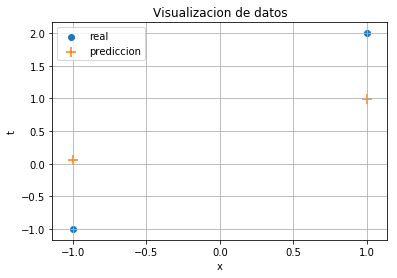

In [563]:
plt.figure()
plt.scatter(x, t)
plt.scatter(x, t_predicted, marker='+', s=100)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(['real', 'prediccion'])
plt.title('Visualizacion de datos')
plt.grid(True)
plt.show()

## Parte 2

Entrenar la red neuronal del ejemplo anterior usando batching

In [553]:
hbatch = nn.fit(x, t, batch_size=2, epochs=100, verbose=0, callbacks=[print_weights_l1, print_weights_l2, print_separator])

[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1

[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
---------------------------------
[array([[-1.6418417]], dtype=float32), array([-1.6418417], dtype=float32)]
[array([[1.0817649]], dtype=float32), array([-3.5736508], dtype=float32)]
-----------

## Parte 3


In [554]:
x1 = np.array([[-8,6],[-8,2],[-4,4],[-2,2],[2,4],[2,8],[3,1],[6,8],[8,4],
               [-4,-2],[-6,-4],[-4,-6],[2,-8],[1,-1],[4,-4],[4,-6],[8,-8],[10,-8]])

x2 = np.array([[-8,4],[-8,3],[-4,2],[-2,6],[-6,-2],[-8,-6],[-4,-4],[2,-2],[2,-6],
               [4,-8],[8,-10],[10,-10],[1,2],[2,6],[4,4],[4,8],[8,2],[8,6]])

t1 = np.ones((18,1))
t2 = np.zeros((18,1))

In [556]:
nnet = keras.models.Sequential([
    Dense(100, activation='linear',input_shape=(2,)),
    Dense(100, activation='tanh'),
    Dense(1, activation='relu')
])

In [557]:
# Configurar el proceso de aprendizaje de la red neuronal
nnet.compile(loss='mean_squared_error', 
             optimizer=keras.optimizers.SGD(lr=0.01), 
             metrics=['accuracy'])

In [558]:
X_training = np.vstack((x1,x2))
T_training = np.vstack((t1,t2))

nnet.fit(X_training, T_training, batch_size=None, epochs=10000, verbose=0)

In [559]:
prediction = nnet.predict(X_training, batch_size=None)

In [560]:
print(prediction[:18].reshape(18,))
print(prediction[18:].reshape(18,))

[1.0030942  0.9856474  1.0186446  0.9996702  1.0216814  0.9887107
 1.0239604  1.0409105  1.0452852  0.9695446  0.95153123 0.9528293
 0.97293234 1.0023977  1.0583363  0.9668718  0.8493691  0.98912555]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07153933
 0.05684242 0.10977945 0.         0.08360866 0.         0.        ]


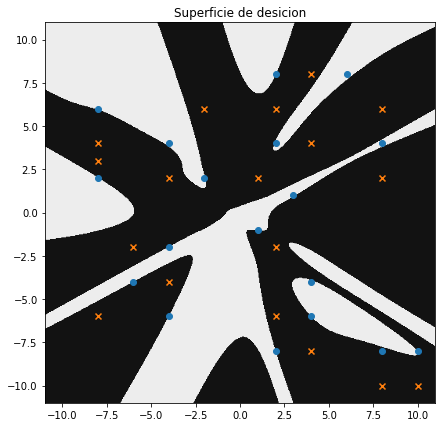

In [561]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-11, 11, steps), np.linspace(-11, 11, steps))

grid_prediction = np.floor(nnet.predict(np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))))
grid_prediction.shape = (steps, steps)

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction>0.5, cmap='gray')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()